<h2>EDA YELP</h2>

Carga de datos originales

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json


In [3]:
df_business = pd.read_pickle(r'C:\HENRY\PROYECTOS HENRY 11\PROYECTO GRUPAL\Datasets\business.pkl')
df_checkin = pd.read_json(r'C:\HENRY\PROYECTOS HENRY 11\PROYECTO GRUPAL\Datasets\checkin.json', lines=True)
df_tip = pd.read_json(r'C:\HENRY\PROYECTOS HENRY 11\PROYECTO GRUPAL\Datasets\tip.json', lines=True)
df_user = pd.read_parquet(r'C:\HENRY\PROYECTOS HENRY 11\PROYECTO GRUPAL\Datasets\user.parquet')


In [4]:
df_review = pd.read_parquet(r'C:\HENRY\PROYECTOS HENRY 11\PROYECTO GRUPAL\Datasets\df_review.parquet')

<h2>BUSINESS</h2>

In [5]:
df_business.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Eliminar columnas duplicadas 
df_business = df_business.loc[:, ~df_business.columns.duplicated()]

In [7]:
#Conteo de columnas duplicadas
df_business.columns.duplicated().sum()

np.int64(0)

Verificar columnas tabla df_business

In [8]:
df_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

Verificar numero de filas y columnas tabla df_business

In [9]:
df_business.shape

(150346, 14)

Verificamos el numero de ciudades unicas en tabla df_business

In [10]:
df_business['city'].nunique()

1416

In [11]:
#Cantidad de business por cada ciudad
business_counts = df_business['city'].value_counts()

Calculamos la cantidad de business por cada ciudad y el porcentaje equivalente

In [12]:
# Contar la cantidad de negocios por cada ciudad 
business_counts = df_business['city'].value_counts()
# Calcular el porcentaje del total para cada ciudad 
total_business = business_counts.sum() 
business_porcentaje = (business_counts / total_business) * 100 
business_porcentaje =business_porcentaje.round(2)
# Crear un DataFrame con el conteo y el porcentaje 
business_city = pd.DataFrame({ 'Count': business_counts, 'Porcentaje': business_porcentaje }) 
# Verificar el DataFrame 
print(business_city)

                   Count  Porcentaje
city                                
Philadelphia       14569        9.69
Tucson              9250        6.15
Tampa               9050        6.02
Indianapolis        7540        5.02
Nashville           6971        4.64
...                  ...         ...
East Norriton          1        0.00
Hernando Bch           1        0.00
WILLOW GROVE           1        0.00
Monchanin              1        0.00
Wesley Chapel  FL      1        0.00

[1416 rows x 2 columns]


Top 15 de ciudades con más business

In [13]:
# 15 ciudades con más business
top_15_cities = business_city.head(15)
top_15_cities

,Count,Porcentaje
city,,
Philadelphia,14569,9.69
Tucson,9250,6.15
Tampa,9050,6.02
Indianapolis,7540,5.02
Nashville,6971,4.64
New Orleans,6209,4.13
Reno,5935,3.95
Edmonton,5054,3.36
Saint Louis,4827,3.21


Gráfica de business por ciudad

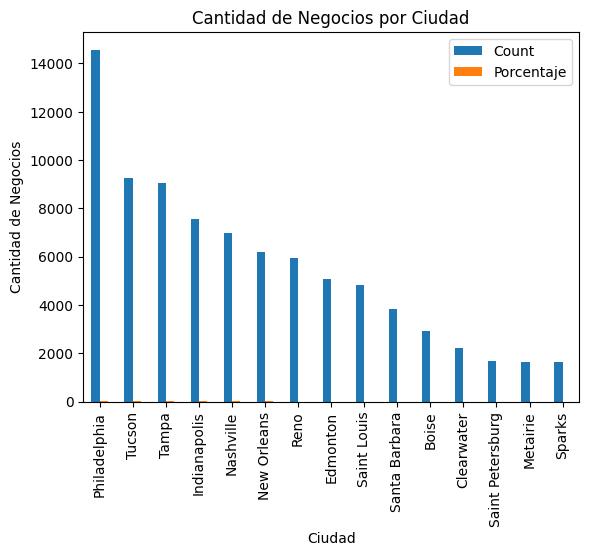

In [14]:
# Crear el diagrama de barras 
top_15_cities.plot(kind='bar') 
# Añadir títulos y etiquetas 
plt.title('Cantidad de Negocios por Ciudad') 
plt.xlabel('Ciudad') 
plt.ylabel('Cantidad de Negocios') 
# Mostrar el gráfico 
plt.show()

Explorando las categorías de los business

In [15]:
#Mostrar algunas categorias para analizar su estructura
df_business['categories'].head(10)

0    Doctors, Traditional Chinese Medicine, Naturop...
1    Shipping Centers, Local Services, Notaries, Ma...
2    Department Stores, Shopping, Fashion, Home & G...
3    Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                            Brewpubs, Breweries, Food
5    Burgers, Fast Food, Sandwiches, Food, Ice Crea...
6    Sporting Goods, Fashion, Shoe Stores, Shopping...
7                  Synagogues, Religious Organizations
8    Pubs, Restaurants, Italian, Bars, American (Tr...
9    Ice Cream & Frozen Yogurt, Fast Food, Burgers,...
Name: categories, dtype: object

Cada business contiene varias categorías

<h3>Conteo de palabras en categories</h3>

In [16]:
# Reemplazar valores None con cadenas vacías
df_business.loc[:, 'categories'] = df_business['categories'].fillna('')

# Concatenar todas las categorías en una sola cadena de texto
all_categories = ', '.join(df_business['categories'])

# Dividir la cadena en palabras individuales
words = all_categories.split(', ')

# Contar la frecuencia de cada palabra
word_counts = Counter(words)

# Mostrar las palabras más comunes
common_words = word_counts.most_common()
print(common_words[:20])


[('Restaurants', 52268), ('Food', 27781), ('Shopping', 24395), ('Home Services', 14356), ('Beauty & Spas', 14292), ('Nightlife', 12281), ('Health & Medical', 11890), ('Local Services', 11198), ('Bars', 11065), ('Automotive', 10773), ('Event Planning & Services', 9895), ('Sandwiches', 8366), ('American (Traditional)', 8139), ('Active Life', 7687), ('Pizza', 7093), ('Coffee & Tea', 6703), ('Fast Food', 6472), ('Breakfast & Brunch', 6239), ('American (New)', 6097), ('Hotels & Travel', 5857)]


Dataframe common_words

In [17]:
categorias = pd.DataFrame(common_words)
# Nombrar las columnas 
categorias.columns = ['Category', 'Count']
categorias.head(20).sort_values(by='Count', ascending=False)

,Category,Count
0,Restaurants,52268
1,Food,27781
2,Shopping,24395
3,Home Services,14356
4,Beauty & Spas,14292
5,Nightlife,12281
6,Health & Medical,11890
7,Local Services,11198
8,Bars,11065
9,Automotive,10773


In [18]:
len(categorias)

1312

In [19]:
# Filtrar DataFrame para categorías que contienen la palabra 'Restaurant' Y 'food'
df_restaurants = df_business[df_business['categories'].str.contains('restaurant', case=False, na=False)]
#Filtrar los registros que contienen 'Food' de los restaurant
df_restaurants = df_business[df_business['categories'].str.contains('food', case=False, na=False)]

print(len(df_restaurants))


35919


In [20]:
# Contar la cantidad de restaurantes por ciudad 
restaurant_counts = df_restaurants['city'].value_counts()
restaurant_count = restaurant_counts.head(20)
restaurant_count = pd.DataFrame(restaurant_count).reset_index()
restaurant_count = pd.DataFrame(restaurant_count)
restaurant_count.columns = ['City', 'Count']
restaurant_count

,City,Count
0,Philadelphia,3756
1,Tampa,2184
2,Indianapolis,1953
3,Tucson,1854
4,New Orleans,1691
5,Nashville,1672
6,Edmonton,1370
7,Reno,1046
8,Saint Louis,968
9,Santa Barbara,672


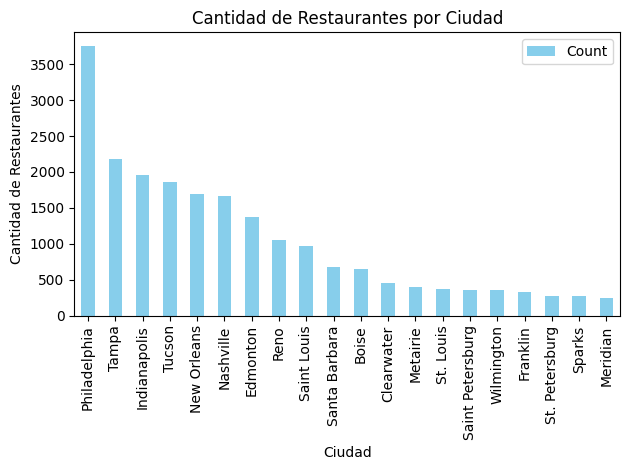

In [21]:
# Crear el diagrama de barras
ax = restaurant_count.plot(kind='bar', color='skyblue', x='City', y='Count')

# Añadir títulos y etiquetas
ax.set_title('Cantidad de Restaurantes por Ciudad')
ax.set_xlabel('Ciudad')
ax.set_ylabel('Cantidad de Restaurantes')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



<h2 style="color: red;">ANÁLISIS COFFE & TEA  -  BREAKFAST & BRUNCH</h2>

In [22]:
df_coffe = df_business[df_business['categories'].str.contains('Coffee & Tea', case=False, na=False)]
df_breakfast = df_business[df_business['categories'].str.contains('Breakfast & Brunch', case=False, na=False)]

In [23]:
# Contar la cantidad de Coffee & Tea por ciudad 
coffe_counts = df_coffe['city'].value_counts()
coffe_counts = coffe_counts.head(20)
coffe_counts = pd.DataFrame(coffe_counts).reset_index()
coffe_counts = pd.DataFrame(coffe_counts)
coffe_counts.columns = ['City', 'Count']
coffe_counts

,City,Count
0,Philadelphia,894
1,Tampa,395
2,Edmonton,350
3,New Orleans,318
4,Tucson,317
5,Nashville,310
6,Indianapolis,300
7,Reno,215
8,Saint Louis,142
9,Boise,138


In [24]:
# Contar la cantidad de Breakfast & Brunch por ciudad 
breakfast_counts = df_breakfast['city'].value_counts()
breakfast_counts = breakfast_counts.head(20)
breakfast_counts = pd.DataFrame(breakfast_counts).reset_index()
breakfast_counts = pd.DataFrame(breakfast_counts)
breakfast_counts.columns = ['City', 'Count']
breakfast_counts

,City,Count
0,Philadelphia,686
1,New Orleans,367
2,Nashville,349
3,Indianapolis,337
4,Tampa,332
5,Tucson,300
6,Edmonton,185
7,Reno,178
8,Saint Louis,177
9,Santa Barbara,119


In [25]:
#Concatenar los resultados de los dos filtros
df_coffe_break = pd.concat([df_coffe, df_breakfast])

In [26]:
df_coffe_break.isnull().sum()

business_id       0
name              0
address           0
city              0
state             0
postal_code       0
latitude          0
longitude         0
stars             0
review_count      0
is_open           0
attributes      104
categories        0
hours           830
dtype: int64

In [27]:
#Confirmar duplicados
#  Convertir los valores de tipo dict en columnas a cadenas JSON
for column in df_coffe_break.columns:
    if df_coffe_break[column].apply(lambda x: isinstance(x, dict)).any():
        df_coffe_break[column] = df_coffe_break[column].apply(json.dumps)

# Verificar duplicados
df_coffe_break.duplicated().sum()

np.int64(1185)

In [ ]:
# Eliminar duplicados
df_coffe_break = df_coffe_break.drop_duplicates()

# Verificar el DataFrame resultante
print(len(df_coffe_break))

11758


In [29]:
df_coffe_break.duplicated().sum()

np.int64(0)

In [30]:
df_coffe_break.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [ ]:
# Contar la cantidad de df_coffe_break por ciudad 
coffe_break_counts = df_coffe_break['city'].value_counts()
coffe_break_counts = coffe_break_counts.head(20)
coffe_break_counts = pd.DataFrame(coffe_break_counts).reset_index()
coffe_break_counts = pd.DataFrame(coffe_break_counts)
coffe_break_counts.columns = ['City', 'Count']
coffe_break_counts

,City,Count
0,Philadelphia,1407
1,Tampa,655
2,New Orleans,600
3,Indianapolis,592
4,Tucson,584
5,Nashville,583
6,Edmonton,504
7,Reno,353
8,Saint Louis,281
9,Boise,224


In [32]:
coffe_break_counts.columns

Index(['City', 'Count'], dtype='object')

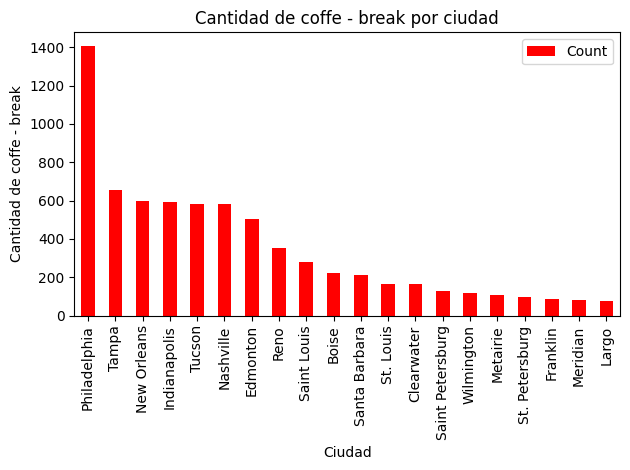

In [33]:

# Crear el diagrama de barras
ax = coffe_break_counts.plot(kind='bar', color='red', x='City', y='Count')

# Añadir títulos y etiquetas
ax.set_title('Cantidad de coffe - break por ciudad')
ax.set_xlabel('Ciudad')
ax.set_ylabel('Cantidad de coffe - break')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Reviews Coffe and Breakfast

In [34]:
df_coffe_break.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [35]:
df_review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [36]:
# Filtrar las reseñas que coinciden con los business_id en df_coffe_break
filtered_reviews = df_review[df_review['business_id'].isin(df_coffe_break['business_id'])]

print(len(filtered_reviews))

1147469


In [47]:
# Combinar con df_coffe_break para obtener la columna 'city'
filtered_reviews_with_city = pd.merge(filtered_reviews, df_coffe_break[['business_id', 'city']], on='business_id')

# Agrupar por ciudad y contar la cantidad de reseñas
reviews_per_city = filtered_reviews_with_city.groupby('city').size().reset_index(name='review_count')
reviews_per_city = reviews_per_city.sort_values(by='review_count', ascending=False)
top_15_cities_review =reviews_per_city.head(15)
print(top_15_cities_review)

                 city  review_count
411      Philadelphia        187777
363       New Orleans        154875
360         Nashville         89844
525             Tampa         68460
544            Tucson         61870
253      Indianapolis         55172
433              Reno         51932
463     Santa Barbara         48152
455       Saint Louis         30100
44              Boise         17806
458  Saint Petersburg         15682
97         Clearwater         14943
149          Edmonton         14240
506         St. Louis         13540
508    St. Petersburg         10933


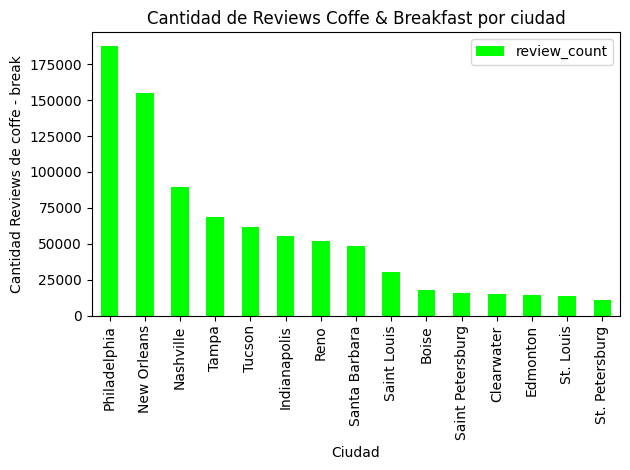

In [48]:
# Crear el diagrama de barras
ax = top_15_cities_review.plot(kind='bar', color='lime', x='city', y='review_count')

# Añadir títulos y etiquetas
ax.set_title('Cantidad de Reviews Coffe & Breakfast por ciudad')
ax.set_xlabel('Ciudad')
ax.set_ylabel('Cantidad Reviews de coffe - break')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Se tienen 1.147.496 Reviews de Coffe and Breakfast

In [38]:
# Contar la cantidad de reviews por ciudad Coffe and Breakfast 
coffe_break_reviews = filtered_reviews['city'].value_counts()
coffe_break_reviews = coffe_break_reviews.head(20)
coffe_break_reviews = pd.DataFrame(coffe_break_reviews).reset_index()
coffe_break_reviews = pd.DataFrame(coffe_break_reviews)
coffe_break_reviews.columns = ['City', 'Count']
coffe_break_reviews

KeyError: 'city'

<h3 style="color: black;">Análisis de otros business de Ocio</h3>

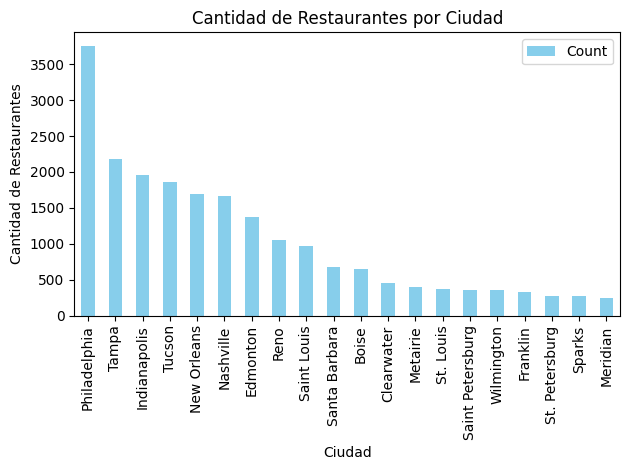

In [34]:
# Crear el diagrama de barras
ax = restaurant_count.plot(kind='bar', color='skyblue', x='City', y='Count')

# Añadir títulos y etiquetas
ax.set_title('Cantidad de Restaurantes por Ciudad')
ax.set_xlabel('Ciudad')
ax.set_ylabel('Cantidad de Restaurantes')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

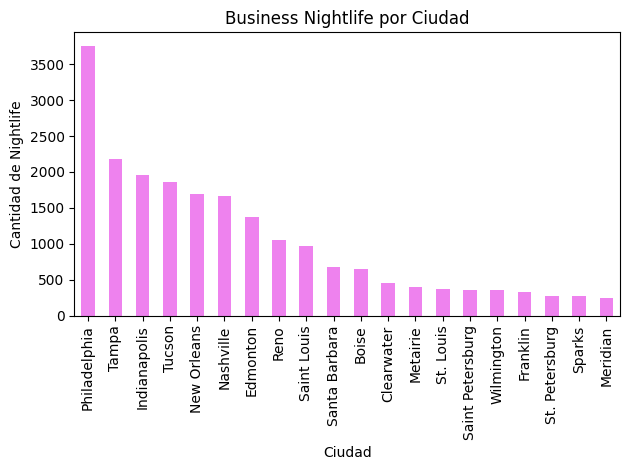

In [35]:
df_Nightlife = df_business[df_business['categories'].str.contains('Nightlife', case=False, na=False)]
Nightlife_counts = df_restaurants['city'].value_counts()
Nightlife_count = Nightlife_counts.head(20)
# Crear el diagrama de barras
ax = Nightlife_count.plot(kind='bar', color='violet', x='City', y='Count')

# Añadir títulos y etiquetas
ax.set_title('Business Nightlife por Ciudad')
ax.set_xlabel('Ciudad')
ax.set_ylabel('Cantidad de Nightlife')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

CLASIFICACIÓN BUSINESS POR CLASIFICACIÓN (STARS)

C:\Users\diani\AppData\Local\Temp\ipykernel_21424\2986980536.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=star_counts.index, y=star_counts.values, palette='viridis')


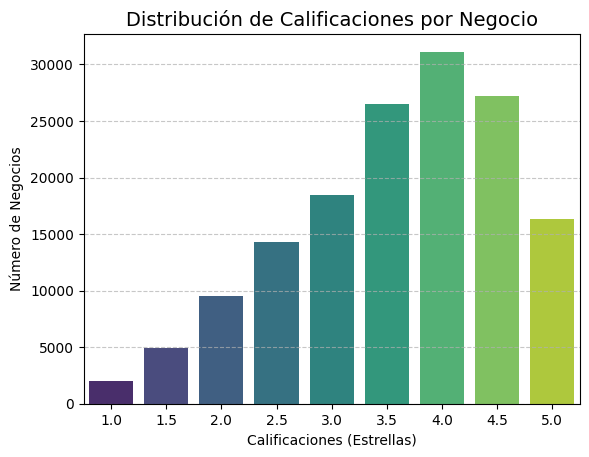

In [36]:

# Agrupamos los datos para contar cuántos negocios tienen cada nivel de calificación
star_counts = df_business['stars'].value_counts().sort_index()

# Crear el gráfico de barras
#plt.figure(figsize=(10, 6))
sns.barplot(x=star_counts.index, y=star_counts.values, palette='viridis')

# Personalizar el gráfico
plt.title('Distribución de Calificaciones por Negocio', fontsize=14)
plt.xlabel('Calificaciones (Estrellas)', fontsize=10)
plt.ylabel('Número de Negocios', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


GRÁFICO DE RELACIÓN ENTRE RESEÑAS Y CALIFICACIONES

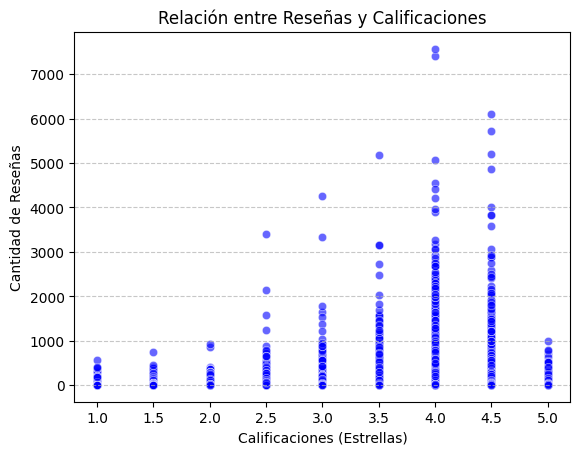

In [37]:
# Crear el gráfico de dispersión
#plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_business, x='stars', y='review_count', alpha=0.6, color='blue')

# Personalizar el gráfico
plt.title('Relación entre Reseñas y Calificaciones', fontsize=12)
plt.xlabel('Calificaciones (Estrellas)', fontsize=10)
plt.ylabel('Cantidad de Reseñas', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Mostrar el gráfico
plt.show()

<h2>REVIEWS</h2>

Columnas de tabla df_review

In [38]:
df_review.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18


In [39]:
df_review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

Cantidad de datos de tabla df_review

In [40]:
df_review.size

62912520

Estadistica descriptiva de tabla df_review

In [41]:
df_review.describe()

,stars,useful,funny,cool,date
count,6.990280e+06,6.990280e+06,6.990280e+06,6.990280e+06,6990280
mean,3.748584e+00,1.184609e+00,3.265596e-01,4.986175e-01,2017-01-11 11:22:33.441780992
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,2005-02-16 03:23:22
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015-01-25 04:53:50.249999872
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2017-06-03 01:26:07
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2019-05-23 00:02:46.249999872
max,5.000000e+00,1.182000e+03,7.920000e+02,4.040000e+02,2022-01-19 19:48:45
std,1.478705e+00,3.253767e+00,1.688729e+00,2.172460e+00,NaN


Verificar valores nulos

In [42]:
df_review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

Verificar duplicados

In [43]:
df_review.duplicated().sum()

np.int64(0)

In [44]:
# Calcular la suma total de cada interacción
interaction_totals = df_review[['useful', 'funny', 'cool']].sum()
interaction_totals

useful    8280748
funny     2282743
cool      3485476
dtype: int64

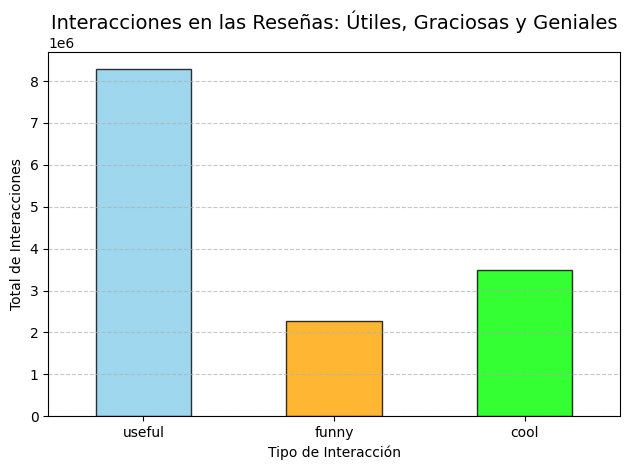

In [45]:
# Crear el gráfico de barras

interaction_totals.plot(kind='bar', color=['skyblue', 'orange', 'lime'], alpha=0.8, edgecolor='black')

# Personalizar el gráfico
plt.title('Interacciones en las Reseñas: Útiles, Graciosas y Geniales', fontsize=14)
plt.ylabel('Total de Interacciones', fontsize=10)
plt.xlabel('Tipo de Interacción', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [46]:
#Tendencia de reviews por años
# Crear una columna con el año
df_review['year'] = df_review['date'].dt.year
# Agrupar por año y contar la cantidad de reseñas
reviews_per_year = df_review.groupby('year').size().reset_index(name='review_count')

# Ordenar por año (opcional)
reviews_per_year = reviews_per_year.sort_values('year')
print(reviews_per_year)

    year  review_count
0   2005           854
1   2006          3853
2   2007         15363
3   2008         48226
4   2009         74387
5   2010        138587
6   2011        230813
7   2012        286570
8   2013        383950
9   2014        522275
10  2015        688415
11  2016        758882
12  2017        820048
13  2018        906362
14  2019        907284
15  2020        554557
16  2021        618189
17  2022         31665


Gráfica de Cantidad de reseñas por año

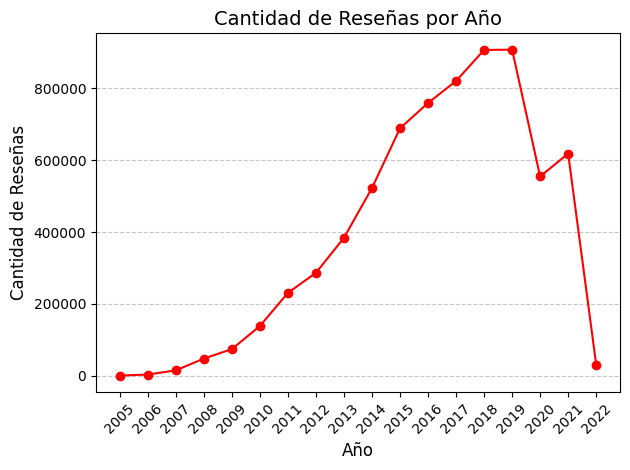

In [47]:
# Convertir la columna 'year' a enteros
reviews_per_year['year'] = reviews_per_year['year'].astype(int)

# Crear el gráfico de líneas con matplotlib 
#plt.figure(figsize=(10, 6)) 
plt.plot(reviews_per_year['year'], reviews_per_year['review_count'], marker='o', color='r') 
# Personalización 
plt.title('Cantidad de Reseñas por Año', fontsize=14) 
plt.xlabel('Año', fontsize=12) 
plt.ylabel('Cantidad de Reseñas', fontsize=12) 
plt.xticks(reviews_per_year['year'], rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
# Mostrar el gráfico 
plt.show()


<h3>USER</h3>

In [48]:
df_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [49]:
df_user.shape

(2105597, 22)

In [50]:
df_user.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [51]:
df_user.duplicated().sum()

np.int64(117700)

In [52]:
#Eliminar los duplicados
df_user.drop_duplicates(inplace=True)
len(df_user)

1987897

In [53]:
df_user.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06
mean,2.339441e+01,4.229634e+01,1.697054e+01,2.379291e+01,1.465740e+00,3.630494e+00,1.807072e+00,2.922631e-01,1.793176e-01,1.336493e-01,6.390723e-02,1.443135e+00,3.011841e+00,2.829308e+00,2.829308e+00,1.056448e+00,1.226859e+00
std,8.256699e+01,6.414806e+02,4.078034e+02,5.653513e+02,1.813075e+01,1.183337e+00,7.360184e+01,1.282467e+01,1.515525e+01,1.135682e+01,1.004363e+01,6.016790e+01,1.193898e+02,9.666385e+01,9.666385e+01,3.217973e+01,9.515751e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.700000e+01,1.300000e+01,2.000000e+00,3.000000e+00,0.000000e+00,4.560000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.747300e+04,2.062960e+05,1.858230e+05,1.998780e+05,1.249700e+04,5.000000e+00,2.578400e+04,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,5.903100e+04,1.010970e+05,4.996700e+04,4.996700e+04,1.593400e+04,8.263000e+04


CANTIDAD DE INTERACCIONES POR USUARIOS 'useful', 'funny', 'cool'

In [54]:
# Calcular la suma total de cada interacción
interaction_totals_usuarios = df_user[['useful', 'funny', 'cool']].sum()
interaction_totals_usuarios

useful    84080758
funny     33735678
cool      47297862
dtype: int64

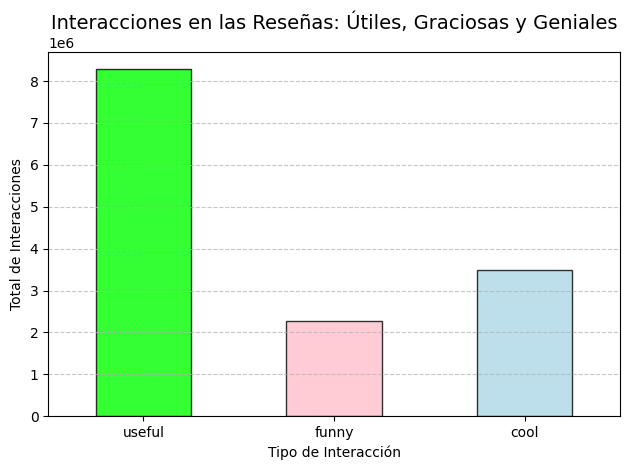

In [55]:
# Crear el gráfico de barras

interaction_totals.plot(kind='bar', color=['lime', 'pink', 'lightblue'], alpha=0.8, edgecolor='black')

# Personalizar el gráfico
plt.title('Interacciones en las Reseñas: Útiles, Graciosas y Geniales', fontsize=14)
plt.ylabel('Total de Interacciones', fontsize=10)
plt.xlabel('Tipo de Interacción', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<h3>TIP</h3>

In [56]:
#Tendencia de TIPS por años
# Crear una columna con el año
df_tip['year'] = df_tip['date'].dt.year
# Agrupar por año y contar la cantidad de reseñas
tip_per_year = df_tip.groupby('year').size().reset_index(name='tip_count')

# Ordenar por año (opcional)
tip_per_year = tip_per_year.sort_values('year')
print(tip_per_year)

    year  tip_count
0   2009        665
1   2010      26712
2   2011      83395
3   2012     110459
4   2013     107563
5   2014     109160
6   2015      89686
7   2016      94333
8   2017      93909
9   2018      67033
10  2019      57646
11  2020      32436
12  2021      34993
13  2022        925


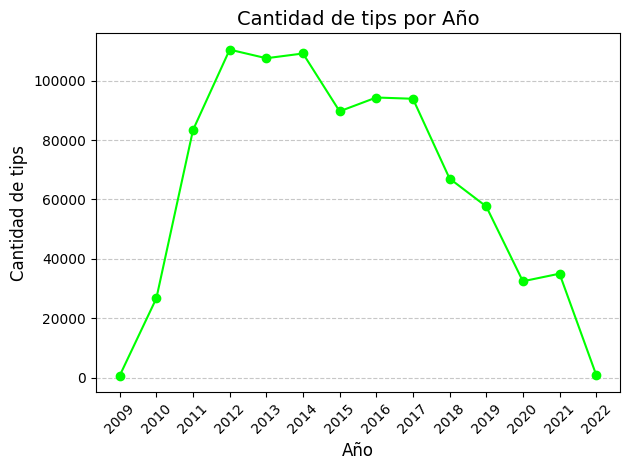

In [57]:
# Convertir la columna 'year' a enteros
tip_per_year['year'] = tip_per_year['year'].astype(int)

#plt.figure(figsize=(10, 6)) 
plt.plot(tip_per_year['year'], tip_per_year['tip_count'], marker='o', color='lime') 
# Personalización 
plt.title('Cantidad de tips por Año', fontsize=14) 
plt.xlabel('Año', fontsize=12) 
plt.ylabel('Cantidad de tips', fontsize=12) 
plt.xticks(tip_per_year['year'], rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
# Mostrar el gráfico 
plt.show()

<h3>CHECKIN</h3>

In [58]:
df_checkin.head(3)

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"


In [59]:
df_checkin.size

263860

In [60]:
df_checkin.isnull().sum()

business_id    0
date           0
dtype: int64

In [61]:
df_checkin.duplicated().sum()

np.int64(0)

In [62]:
df_checkin.shape

(131930, 2)

In [63]:
df_checkin.describe()

,business_id,date
count,131930,131930
unique,131930,131930
top,zzyx5x0Z7xXWWvWnZFuxlQ,2015-01-06 17:51:53
freq,1,1


In [64]:
#Checkin por año

# Convertir las fechas a una lista 
dates = df_checkin['date'].str.split(', ').explode()
# Crear un DataFrame con las fechas separadas
df_dates = pd.DataFrame(dates, columns=["date"]) 
# Convertir las fechas a formato datetime 
df_dates["date"] = pd.to_datetime(df_dates["date"]) 
# Extraer el año de las fechas 
df_dates["year"] = df_dates["date"].dt.year 
# Contar los check-ins por año 
checkins_per_year = df_dates["year"].value_counts().sort_index() 
# Mostrar el resultado 
print(checkins_per_year)

year
2009          2
2010     209153
2011     901457
2012    1289492
2013    1552799
2014    1625884
2015    1709857
2016    1554774
2017    1348466
2018    1157252
2019    1035160
2020     474172
2021     477467
2022      20940
Name: count, dtype: int64


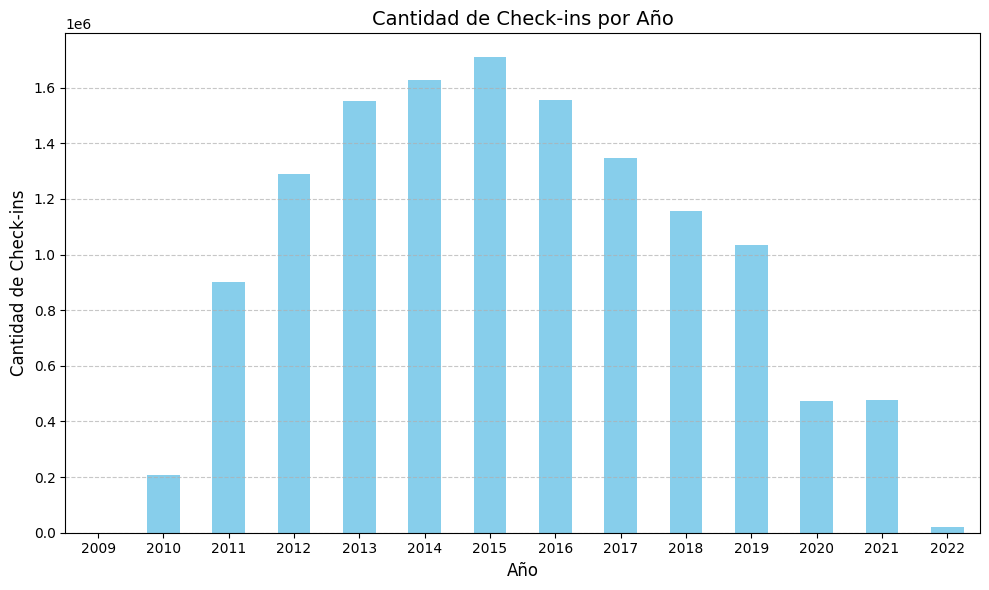

In [65]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
checkins_per_year.plot(kind='bar', color='skyblue')

# Añadir títulos y etiquetas
plt.title('Cantidad de Check-ins por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Check-ins', fontsize=12)
plt.xticks(rotation=0)  # Asegurarse de que los años se muestren correctamente
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()
